# CNN 실습

이번 시간에는 대장 조직 데이터를 활용하여 앞서 배운 CNN모델을 만들어보겠습니다.

`Colorectal histology` 데이터는 대장의 조직 모양과 8가지 클래스 정보가 들어있습니다.

더 고화질의 데이터를 활용할 수 있지만, 원활한 실습을 위해 28 * 28 픽셀 데이터를 사용하여 분류해보겠습니다.

In [107]:
import pandas as pd

import tensorflow as tf
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import time

In [3]:
pd.set_option('max_columns', 100)

# 파일로드, 정규화, reshape

In [48]:
data = pd.read_csv('hmnist_28_28_L.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,pixel0040,pixel0041,pixel0042,pixel0043,pixel0044,pixel0045,pixel0046,pixel0047,pixel0048,pixel0049,...,pixel0735,pixel0736,pixel0737,pixel0738,pixel0739,pixel0740,pixel0741,pixel0742,pixel0743,pixel0744,pixel0745,pixel0746,pixel0747,pixel0748,pixel0749,pixel0750,pixel0751,pixel0752,pixel0753,pixel0754,pixel0755,pixel0756,pixel0757,pixel0758,pixel0759,pixel0760,pixel0761,pixel0762,pixel0763,pixel0764,pixel0765,pixel0766,pixel0767,pixel0768,pixel0769,pixel0770,pixel0771,pixel0772,pixel0773,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,101,110,154,160,95,44,139,184,164,160,115,119,197,101,151,186,186,187,153,92,47,21,50,130,103,110,143,80,94,130,138,209,181,53,90,174,158,143,116,69,109,140,156,156,191,165,125,91,125,104,...,140,133,133,160,72,53,121,47,59,141,150,118,103,117,100,71,128,102,110,141,139,76,98,115,124,176,180,147,121,101,121,138,74,95,163,75,62,128,138,128,103,73,72,75,152,130,96,133,159,2
1,67,66,69,76,80,57,46,67,90,77,82,51,39,62,84,78,82,64,81,79,46,76,93,71,41,67,106,38,58,52,67,83,73,53,55,50,43,46,73,50,60,64,44,65,82,77,92,50,48,86,...,74,77,81,83,84,70,55,54,57,56,64,75,75,71,81,90,80,74,76,76,74,79,77,64,63,57,56,51,56,64,76,79,76,82,88,84,64,58,58,57,58,65,74,80,81,83,77,75,73,2
2,127,137,121,140,170,111,128,117,60,105,90,53,81,117,171,148,96,109,105,127,225,244,151,139,128,153,160,112,135,130,106,117,105,108,109,116,74,91,116,145,131,117,119,121,136,124,87,85,171,200,...,210,139,153,147,140,120,93,141,121,79,80,109,149,125,152,146,149,113,167,146,97,108,59,110,132,69,125,159,179,109,122,143,119,127,115,128,109,91,89,69,90,100,143,119,148,140,193,146,97,2
3,80,90,101,106,120,100,99,66,63,91,95,90,87,120,82,52,79,100,135,92,65,113,84,82,92,111,125,92,84,82,91,100,112,97,95,85,60,78,95,103,81,108,112,50,60,90,110,127,77,76,...,105,95,93,100,108,128,144,83,99,133,160,143,119,98,115,88,76,128,91,79,78,128,204,180,79,70,99,76,87,107,97,90,97,92,86,113,85,123,148,154,131,109,97,102,71,93,120,84,62,2
4,153,141,121,132,110,131,119,99,101,91,85,138,159,147,159,150,105,109,131,112,134,158,106,109,163,148,121,175,152,176,129,144,140,132,135,93,97,73,97,144,160,158,153,147,139,166,170,113,124,149,...,101,85,124,121,48,45,143,122,128,158,108,90,107,121,123,148,165,189,174,145,171,118,150,98,114,200,171,112,110,137,109,114,85,106,137,141,131,103,107,134,117,121,136,178,192,210,189,149,155,2


In [49]:
data.shape

(5000, 785)

In [50]:
data['label'].value_counts()

2    625
5    625
7    625
6    625
8    625
1    625
4    625
3    625
Name: label, dtype: int64

In [51]:
X = data.drop('label',axis=1)
Y = data['label']

X = X/255.0

In [77]:
X.shape

(5000, 784)

In [78]:
X = X.values.reshape(-1,28,28,1)

In [79]:
X.shape

(5000, 28, 28, 1)

# 이미지 확인

In [52]:
import matplotlib.pyplot as plt

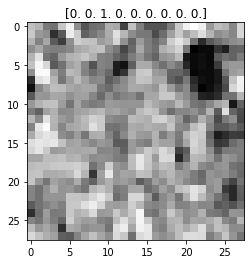

In [95]:
plt.imshow(X[0], cmap='Gray')
plt.title(Y[0])
plt.show()

# label 정보 encoding

- 숫자로 되어있는 label 정보를 one-hot-encoding으로 변환하여 사용하겠습니다.

In [94]:
# Label Encoding 
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding for better results
Y = to_categorical(Y)

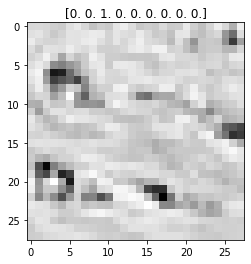

In [96]:
plt.imshow(X[1], cmap='Gray')
plt.title(Y[1])
plt.show()

# train-test 분리

train - test set을 분리하고, train 데이터 내에서 validation set도 분리하여 활용하겠습니다.

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [98]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=42)

In [99]:
x_train.shape

(3200, 28, 28, 1)

In [100]:
x_val.shape

(800, 28, 28, 1)

In [101]:
X_test.shape

(1000, 28, 28, 1)

In [102]:
y_train.shape

(3200, 9)

# 모델 만들기
<div class="alert alert-block alert-warning">
    앞 시간에 배운 내용을 활용해서 각자 CNN 모델을 만들고 학습을 진행한 뒤 test accuracy를 구해보세요
</div>


학습 이후 예측 값을 출력해보면 각 클래스에 속할 확률 값이 들어있는 array가 출력됩니다.

이 중 가장 큰 값이 있는 컬럼을 최종 결과로 도출할 것이므로 argmax를 사용하여 가장 큰 값의 인덱스를 반환합니다.

In [ ]:
Y_pred = model.predict(X_test)

In [184]:
Y_pred_class = np.argmax(Y_pred, axis=1)

In [185]:
accuracy_score(np.argmax(Y_test, axis=1), Y_pred_class)

0.795

# Data Augmentation

이미지를 분류하는 CNN 모델도 일반적인 머신러닝 모델과 마찬가지로 overfitting(과적합)에 유의해야합니다. 

CNN 모델의 성능을 높이면서 과적합을 극복할 수 있는 근본적인 해결책은 학습 데이터의 다양성을 늘리는 것입니다.

그러나 학습 데이터를 아무리 많이 수집하더라도 수집된 데이터 내에는 편향된 데이터가 존재할 수 밖에 없습니다.

예를 들어 강아지 이미지를 수집하다보면 아래처럼 밝은 곳에서 찍은 사진이 많이 수집됩니다.<br>

<img src="https://blog.kakaocdn.net/dn/bQCM5T/btrIdc5kcBx/wj5SFfUOlcaGQbMkuDaGK1/img.jpg" width="150" heigh="100" align='left'/>
<img src="https://blog.kakaocdn.net/dn/XWklf/btrH49okHPv/xkZpFR5oBt5GiJToWWjQt0/img.jpg" width="150" heigh="100" align='left'/>
<img src="https://blog.kakaocdn.net/dn/cqDCW9/btrIcHdWeVD/R9rWs9MtB4VAztq1Au2oXk/img.jpg" width="113" heigh="100" align='left'/>
<img src="https://blog.kakaocdn.net/dn/bLc1Cl/btrIbL8FLqN/JlKbsCXaW2yD5i2cMjc9tk/img.jpg" width="113" heigh="100" align='left'/>
<br><br><br><br><br><br><br><br>

이때 아래 사진처럼 test 데이터로 어두운 곳에서 찍힌 강아지 사진이 들어오면 모델은 새로운 유형의 사진으로 인식하여 맞추기 어려워합니다.

<img src="https://blog.kakaocdn.net/dn/ohfkL/btrIej337KW/qAlaZ03fip6zxKUcGyZT11/img.jpg" width="113" heigh="100" align='left'/>
<br><br><br><br><br><br><br><br><br>
따라서 데이터를 아무리 많이 모으더라도 항상 데이터는 부족하다고 볼 수 있습니다.

시간과 비용을 적게 소모하면서 학습 데이터의 다양성을 늘리기 위해 나온 것이 Data Augmentation 입니다.

하나의 원본 이미지를 다양한 버전으로 만들어서 학습시킵니다.

이때 자주 사용되는 기법은 다음과 같습니다.

- Flipping
- Rotating
- Cropping
- Colour jittering
- Edge Enhancement
- Fancy PCA
- Mixup

다양한 방법이 있습니다.

Data Augmentation 할 때 주의할 점은 원래 데이터의 의미가 달라지면 안되는 점 입니다. 예를 들어 숫자 6을 뒤집으면 9가 되면서 의미가 변질되기 때문에 주의해야합니다.

따라서 데이터 셋마다 적절한 기법을 선택하는 것이 중요합니다.

Tensorflow.keras의 ImageDataGenerator 는 Data Augmentation을 대신 해주는 함수입니다.

ImageDataGenerator 를 사용하면 객체 생성 이후 flow 메소드에 배치사이즈, X, Y 설정을 인자로 넣어줘야합니다.

앞서 배운 CNN 모델과 다르게 인자를 추가하는 이유는, 이미지 사이즈가 커질수록 한 번에 이미지를 CPU, GPU에 올릴 수 없기 때문에 배치 사이즈 크기 설정 같은 처리를 미리 ImageDataGenerator가 처리해야하기 때문입니다.

<div class="alert alert-block alert-warning">
    앞서 만든 모델을 학습시키는 과정에 data augmentation을 적용해보겠습니다.
</div>

model = Sequential()

...

In [187]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [188]:
datagen = ImageDataGenerator(
        rotation_range=0.5, 
        zoom_range = 0.5, 
        width_shift_range=0.5,  
        height_shift_range=0.5, 
        horizontal_flip=True, 
        vertical_flip=True,)

In [189]:
model.fit_generator(datagen.flow(x_train,y_train, batch_size=200, shuffle=True),
                              epochs = 200, validation_data = (x_val,y_val),  )

C:\Users\kjy\anaconda3\envs\env_keras\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
16/16 [==============================] - 3s 144ms/step - loss: 2.1284 - accuracy: 0.1263 - val_loss: 2.0296 - val_accuracy: 0.1250
Epoch 2/200
16/16 [==============================] - 2s 115ms/step - loss: 1.9391 - accuracy: 0.1436 - val_loss: 1.8588 - val_accuracy: 0.2100
Epoch 3/200
16/16 [==============================] - 2s 111ms/step - loss: 1.6732 - accuracy: 0.2779 - val_loss: 1.5193 - val_accuracy: 0.3512
Epoch 4/200
16/16 [==============================] - 1s 85ms/step - loss: 1.4178 - accuracy: 0.3563 - val_loss: 1.4108 - val_accuracy: 0.3462
Epoch 5/200
16/16 [==============================] - 2s 112ms/step - loss: 1.2852 - accuracy: 0.3921 - val_loss: 1.3092 - val_accuracy: 0.4450
Epoch 6/200
16/16 [==============================] - 2s 122ms/step - loss: 1.2970 - accuracy: 0.4189 - val_loss: 1.4085 - val_accuracy: 0.4350
Epoch 7/200
16/16 [==============================] - 2s 118ms/step - loss: 1.2574 - accuracy: 0.4513 - val_loss: 1.2430 - val_accuracy: 0.4938


16/16 [==============================] - 1s 35ms/step - loss: 0.7911 - accuracy: 0.6867 - val_loss: 1.3102 - val_accuracy: 0.5850
Epoch 116/200
16/16 [==============================] - 1s 36ms/step - loss: 0.7803 - accuracy: 0.7124 - val_loss: 0.8037 - val_accuracy: 0.6787
Epoch 117/200
16/16 [==============================] - 1s 36ms/step - loss: 0.7759 - accuracy: 0.6996 - val_loss: 0.8061 - val_accuracy: 0.6950
Epoch 118/200
16/16 [==============================] - 1s 37ms/step - loss: 0.7552 - accuracy: 0.6984 - val_loss: 1.0835 - val_accuracy: 0.6225
Epoch 119/200
16/16 [==============================] - 1s 36ms/step - loss: 0.7737 - accuracy: 0.6984 - val_loss: 0.9913 - val_accuracy: 0.6475
Epoch 120/200
16/16 [==============================] - 1s 36ms/step - loss: 0.7593 - accuracy: 0.7029 - val_loss: 1.1130 - val_accuracy: 0.6263
Epoch 121/200
16/16 [==============================] - 1s 36ms/step - loss: 0.7488 - accuracy: 0.7187 - val_loss: 0.7922 - val_accuracy: 0.7050
Epoch 

Epoch 172/200
16/16 [==============================] - 1s 35ms/step - loss: 0.7016 - accuracy: 0.7419 - val_loss: 0.9603 - val_accuracy: 0.6575
Epoch 173/200
16/16 [==============================] - 1s 35ms/step - loss: 0.7087 - accuracy: 0.7287 - val_loss: 0.8290 - val_accuracy: 0.6938
Epoch 174/200
16/16 [==============================] - 1s 35ms/step - loss: 0.7469 - accuracy: 0.7199 - val_loss: 0.9759 - val_accuracy: 0.6488
Epoch 175/200
16/16 [==============================] - 1s 35ms/step - loss: 0.7047 - accuracy: 0.7236 - val_loss: 0.7953 - val_accuracy: 0.7038
Epoch 176/200
16/16 [==============================] - 1s 35ms/step - loss: 0.6980 - accuracy: 0.7320 - val_loss: 0.8289 - val_accuracy: 0.6888
Epoch 177/200
16/16 [==============================] - 1s 35ms/step - loss: 0.7253 - accuracy: 0.7121 - val_loss: 0.8659 - val_accuracy: 0.6700
Epoch 178/200
16/16 [==============================] - 1s 35ms/step - loss: 0.7361 - accuracy: 0.7170 - val_loss: 0.9944 - val_accuracy:

In [196]:
Y_test_pred = model.predict(X_test)
Y_true = np.argmax(Y_test, axis=1)
accuracy_score(Y_true, np.argmax(Y_test_pred, axis=1))

0.693